# Linear Regression Simply predict the value on dependent variable in terms of independent variable

Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


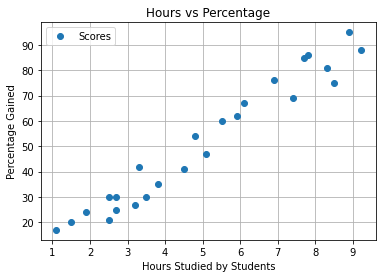

In [3]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied by Students')  
plt.ylabel('Percentage Gained')
plt.grid()
plt.show()

#Lets read the Data type of Data Given

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


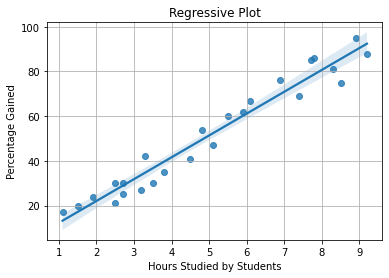

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot')
plt.xlabel('Hours Studied by Students')  
plt.ylabel('Percentage Gained')
plt.grid()
plt.show()
print(df.corr())

Using Sklearn Models and Applying Linear Regression

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
## Defininf x and y from the df
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

## Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("Model is trained Successfully")

Model is trained Successfully


Finally Predicting The model with dependent Variable and then Plotting Actual vs Predicted

In [21]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [22]:
compare_scores = pd.DataFrame({'Actual Marks' : val_y, "Predicted Marks": pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


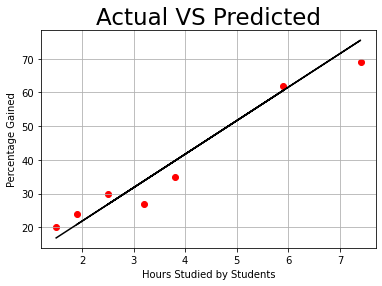

In [29]:
plt.scatter(x=val_x, y=val_y, color='red')
plt.plot(val_x, pred_y, color='Black')
plt.title('Actual VS Predicted',size =23)
plt.xlabel('Hours Studied by Students')  
plt.ylabel('Percentage Gained')
plt.grid()
plt.show()

In the Last using Sklearn Metrics and Mean Absolute Error(MAE) method finiding the Score and MAE

In [30]:
from sklearn.metrics import mean_absolute_error

In [35]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(answer))

Score = [93.89272889]


In [38]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y,pred_y)) 

Mean Absolute Error: 4.130879918502486
